In [18]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Q1 Regression Methods

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tabulate import tabulate
import datetime as dt

## Q1.1 Processing stock pirce data in Python

### Q1.1.1

In [3]:
px = pd.read_csv("./../data/priceData.csv").set_index('date').dropna()
dates = px.index
date_axis = [dt.datetime.strptime(d,'%d/%m/%Y').date() for d in dates]
logpx = np.log(px)

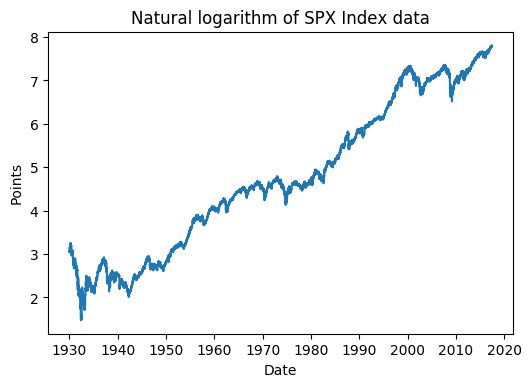

In [4]:
plt.figure(dpi=100)
plt.plot(date_axis,logpx)
plt.title('Natural logarithm of SPX Index data')
plt.xlabel('Date')
plt.ylabel('Points')
plt.show()

### Q1.1.2

In [5]:
WINDOW_SZ = 252

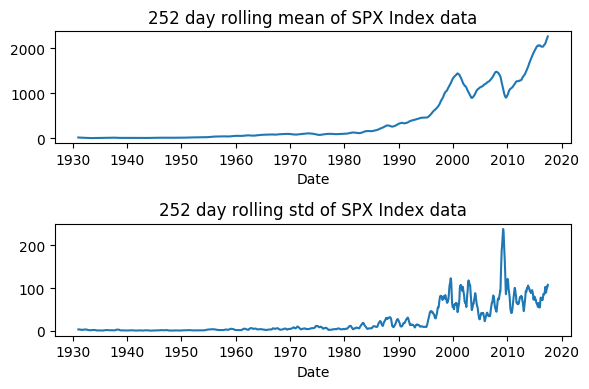

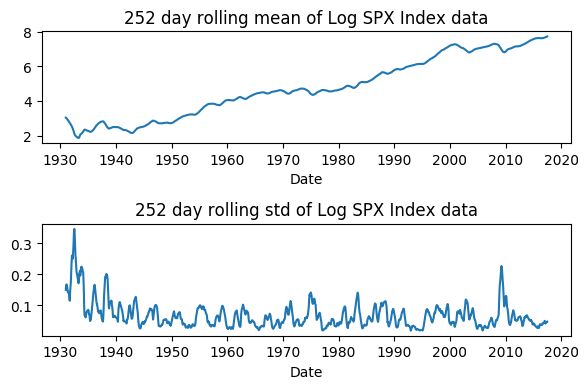

In [6]:
plt.figure(dpi=100)
plt.subplot(211)
plt.title('252 day rolling mean of SPX Index data')
plt.xlabel('Date')
plt.plot(date_axis,px.rolling(WINDOW_SZ).mean())
# Sliding standard deviation
plt.subplot(212)
plt.plot(date_axis,px.rolling(WINDOW_SZ).std())
plt.title('252 day rolling std of SPX Index data')
plt.xlabel('Date')
plt.tight_layout()
plt.show()
# Log Sliding mean
plt.figure(dpi=100)
plt.subplot(211)
plt.plot(date_axis,logpx.rolling(WINDOW_SZ).mean())
plt.title('252 day rolling mean of Log SPX Index data')
plt.xlabel('Date')
# Log Sliding standard deviation
plt.subplot(212)
plt.plot(date_axis,logpx.rolling(WINDOW_SZ).std())
plt.title('252 day rolling std of Log SPX Index data')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

#### Stationarity of price time-series

The rolling mean for both price and log price shows that the mean price trends upwards.
Neither of these time-series are stationairy.

The rolling std for price also trends upwards, but the log price std does not exhibit a clear, positive trend.
The simple price rolling std is susceptible to the exponential growth of the price.
The same percentge change in 2019, would produce a larger variance value than that same percentage change in 1940.
So the rolling std of the price is not stationary.

The rolling std of the log price is obtained from the linearly increasing log price.
This makes is less susceptible to the trend of the log price time-series, and is stationary.

### Q1.1.3

In [7]:
# log return
logret = logpx.diff()

# simple return
simpret = px.pct_change()

#### Sliding statistics of log returns

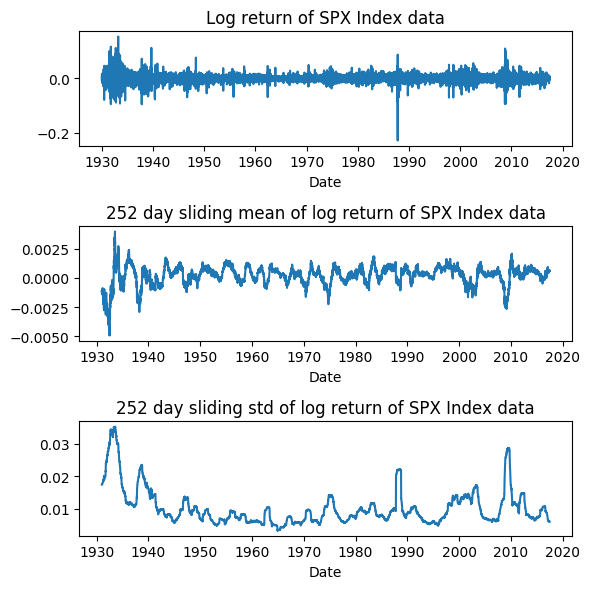

In [8]:
# Log returns
plt.figure(dpi=100, figsize=(6,6))
plt.subplot(311)
plt.plot(date_axis,logret)
plt.title('Log return of SPX Index data')
plt.xlabel('Date')
plt.tight_layout()
# Sliding mean Log return
plt.subplot(312)
logret_roll_mean = logret.rolling(WINDOW_SZ).mean()
plt.plot(date_axis,logret_roll_mean)
plt.title('252 day sliding mean of log return of SPX Index data')
plt.xlabel('Date')
5
plt.tight_layout()
# Sliding var Log return
plt.subplot(313)
logret_roll_var = logret.rolling(WINDOW_SZ).std()
plt.plot(date_axis,logret_roll_var)
plt.title('252 day sliding std of log return of SPX Index data')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

#### Sliding statistics of simple returns

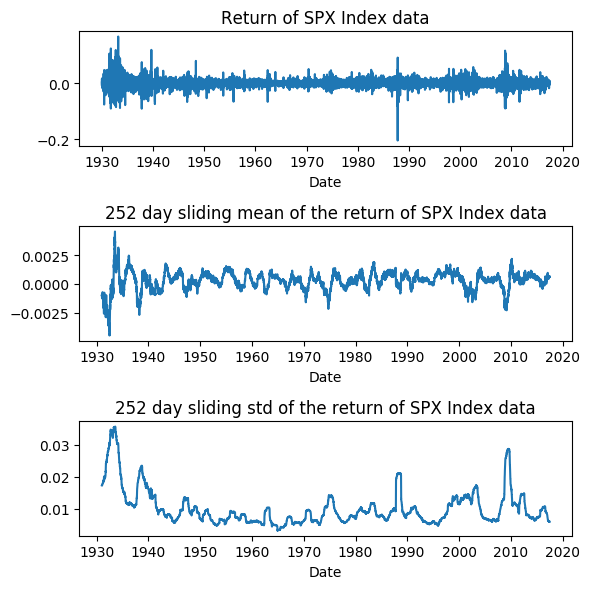

In [9]:
# Simple return
plt.figure(dpi=100, figsize=(6,6))
plt.subplot(311)
plt.title('Return of SPX Index data')
plt.xlabel('Date')
plt.plot(date_axis,simpret)
plt.tight_layout()
# Sliding mean simple return
plt.subplot(312)
simpret_roll_mean = simpret.rolling(WINDOW_SZ).mean()
plt.title('252 day sliding mean of the return of SPX Index data')
plt.xlabel('Date')
plt.plot(date_axis,simpret_roll_mean)
plt.tight_layout()
# Sliding variance simple return
plt.subplot(313)
simpret_roll_var = simpret.rolling(WINDOW_SZ).std()
plt.title('252 day sliding std of the return of SPX Index data')
plt.xlabel('Date')
plt.plot(date_axis,simpret_roll_var)
plt.tight_layout()

The rolling mean of both the log return and simple return are stationary, unlike the rolling means of the log price and price.

This makes the time-series more suitable for analysis as it removes trends and allows for better comparison to other time-series.

### Q1.1.4

#### Suitability of log returns over simple returns for SP purposes:

If we assume that prices are log normally distributed, then the log returns would be normally distributed.
This property is useful for when normality is assumed in statisics.

When returns are very small, the log returns are very close in value to the simple returns. Small returns are common for trades holding the asset for a short duration, e.g. one day / daily returns.

Log returns can be decomposed into the difference between two logs. So the compound return over n time periods can be done in O(1) time.
The sum of normal values is normal, but the product is not. So the compound return obtained via log returns is also normally distributed.

In [10]:
# Jarque-Bera test for Gaussianity
from scipy import stats

m=np.array([ ["log price",stats.jarque_bera(logpx)[1]],
             ["log returns",stats.jarque_bera(logret[1:])[1]],
             ["simple returns",stats.jarque_bera(simpret[1:])[1]] ])
headers = ["Data", "JB p-value"]
table = tabulate(m, headers, tablefmt="fancy_grid")
print(table)

╒════════════════╤══════════════╕
│ Data           │   JB p-value │
╞════════════════╪══════════════╡
│ log price      │            0 │
├────────────────┼──────────────┤
│ log returns    │            0 │
├────────────────┼──────────────┤
│ simple returns │            0 │
╘════════════════╧══════════════╛


The Jarque-Bera test returned 0 for the log returns, thus rejected the null hypothesis.
This implies that the original price data was not log normally distributed. However, over shorter period of time, the prices should be log normally distributed.
So the theoretical advantages of using simple returns would not apply to this SPX time-series.

### Q1.1.5

In [11]:
data = {'prices': [1, 2, 1]}
price_df = pd.DataFrame(data, columns=['prices'])
simple_ret = price_df.pct_change()
log_ret = np.log(price_df).diff()
# correct for missing first return
simple_ret.prices[0] = 0
log_ret.prices[0] = 0

m=np.array([ [1,simple_ret.prices[0]], [2,simple_ret.prices[1]], [3,simple_ret.prices[2]] ])
headers = ["Day", "Simple Return"]
table = tabulate(m, headers, tablefmt="fancy_grid")
print(table)
print("The simple returns give a total return of: {}".format(sum(simple_ret.prices)))

m=np.array([ [1,log_ret.prices[0]], [2,log_ret.prices[1]], [3,log_ret.prices[2]] ])
headers = ["Day", "Simple Return"]
table = tabulate(m, headers, tablefmt="fancy_grid", floatfmt=".3f")
print(table)
print("The log returns give a total return of: {}".format(sum(log_ret.prices)))

╒═══════╤═════════════════╕
│   Day │   Simple Return │
╞═══════╪═════════════════╡
│     1 │             0   │
├───────┼─────────────────┤
│     2 │             1   │
├───────┼─────────────────┤
│     3 │            -0.5 │
╘═══════╧═════════════════╛
The simple returns give a total return of: 0.5
╒═══════╤═════════════════╕
│   Day │   Simple Return │
╞═══════╪═════════════════╡
│ 1.000 │           0.000 │
├───────┼─────────────────┤
│ 2.000 │           0.693 │
├───────┼─────────────────┤
│ 3.000 │          -0.693 │
╘═══════╧═════════════════╛
The log returns give a total return of: 0.0


This example shows that log returns are symmetric, and so the compound log returns can be calculated with just the initial and final prices. 

### Q1.1.6

Log returns should not be used over long periods of times, as the assumption of log-normallity is unrealistic.

Log returns are not linearly additive across assets, and so should not be used when dealing with multi-asset portfolios.

## Q1.2 ARMA vs ARIMA Models for Financial Applications

### Q1.2.1

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
import copy
import datetime as dt

In [13]:
snp = pd.read_csv("./../data/snp_500_2015_2019.csv").set_index(['Date'])
snp_close = snp['Close'].to_frame().apply(np.log)
#snp_close.head()

dates = snp.index
date_axis = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]

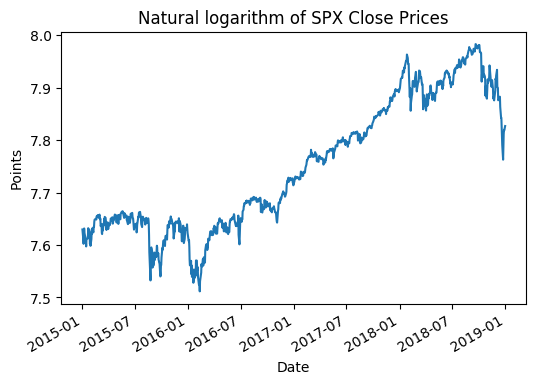

In [14]:
fig, ax = plt.subplots(dpi=100)
ax.plot(date_axis, snp_close)
# rotate and align the tick labels so they look better
fig.autofmt_xdate()

plt.title('Natural logarithm of SPX Close Prices')
plt.xlabel('Date')
plt.ylabel('Points')
plt.show()

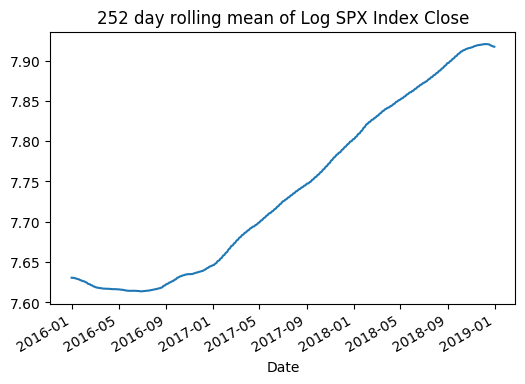

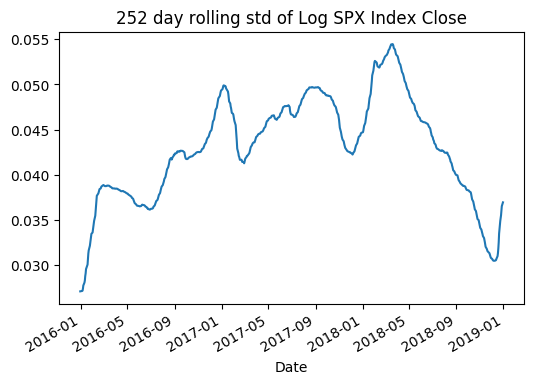

In [15]:
WINDOW_SZ = 252
# Log Sliding mean
fig, ax = plt.subplots(dpi=100)
ax.plot(date_axis, snp_close.rolling(WINDOW_SZ).mean())
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.title('252 day rolling mean of Log SPX Index Close')
plt.xlabel('Date')
plt.show()

# Log Sliding standard deviation
fig, ax = plt.subplots(dpi=100)
ax.plot(date_axis, snp_close.rolling(WINDOW_SZ).std())
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.title('252 day rolling std of Log SPX Index Close')
plt.xlabel('Date')
plt.show()

The rolling mean shows that the time-series is not stationary, so ARMA not suitable. and so ARIMA is more appropriate.

### Q1.2.2

In [19]:
snp_arma = copy.deepcopy(snp_close)
snp_arma.columns = ['True']
snp_arma['Res'] = ARIMA(snp_arma, order=(1,0,1)).fit().resid
snp_arma['Prediction'] = snp_arma['True'] - snp_arma['Res']

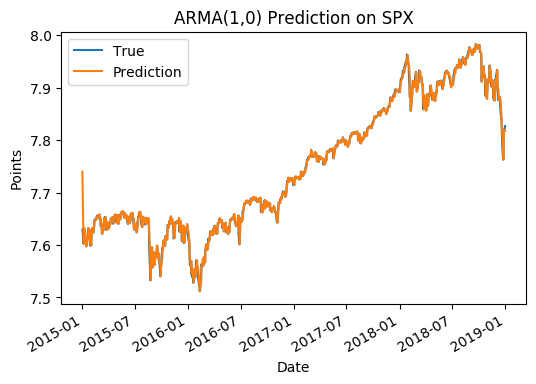

In [20]:
fig, ax = plt.subplots(dpi=100)
ax.plot(date_axis, snp_arma['True'], label="True")
ax.plot(date_axis, snp_arma['Prediction'], label="Prediction")
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.title('ARMA(1,0) Prediction on SPX')
plt.xlabel('Date')
plt.ylabel("Points")
plt.legend()
plt.show()

In [21]:
arma_1_0_sse = np.sum((snp_arma['True']-snp_arma['Prediction'])**2)
print("SSE of ARMA(1,0) Predictions: {}".format(arma_1_0_sse))

SSE of ARMA(1,0) Predictions: 0.08675908609244501


The ARMA(1,0) model appears to perform well at predicting this time-series.

The model predicts the next days prices as the current days price, with an adiional amount of small, random noise.

This is effectively a random walk, which can be viable for very short term predictions, shown by the low SSE of the model.

In practice, this is not that useful unless the stock is only held for a day. Since the model heavily relies on the trend, predictions for prices further than one day away will have this trend bias along with compounding errors.

### Q1.2.3

In [22]:
snp_arima = copy.deepcopy(snp_close)
snp_arima.columns = ['True']
snp_arima['Res'] = ARIMA(snp_arima, order=(1,1,0)).fit().resid
snp_arima['Prediction'] = snp_arima['True'] - snp_arima['Res']

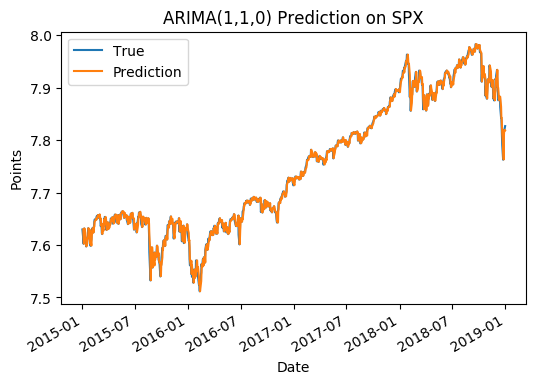

In [23]:
fig, ax = plt.subplots(dpi=100)
ax.plot(date_axis, snp_arima['True'], label="True")
ax.plot(date_axis, snp_arima['Prediction'], label="Prediction")
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.title('ARIMA(1,1,0) Prediction on SPX')
plt.xlabel('Date')
plt.ylabel("Points")
plt.legend()
plt.show()

In [24]:
arima_1_1_0_sse = np.sum((snp_arima['True']-snp_arima['Prediction'])**2)
print("SSE of ARIMA(1,1,0) Predictions: {}".format(arima_1_1_0_sse))

SSE of ARIMA(1,1,0) Predictions: 0.0746545241081268


The ARIMA(1,1,0) model produced predictions with a lower SSE.

ARIMA 'detrends' the data, and the reliance on trends is minimal compared to ARMA(1,0).
This makes the ARIMA more suitable for predicting returns further than a day out.

### Q1.2.4

The log prices have the symmetric property.
This is important for the initial differencing step in ARIMA to correctly remove the trends.

## Q1.3

### Q1.3.1

VAR can be represented as $$ \mathbf{Y} = \mathbf{BZ}+\mathbf{U} \quad (1.3.1\space1) $$ where:

$$\quad (1.3.1\space2)$$
$$
\mathbf{Y} = [\mathbf{y}[p]\space\space[\mathbf{y}[p+1]\space...\space[\mathbf{y}[T]]
$$

$$
\mathbf{B} = [\mathbf{c}\space\mathbf{A}_1\space\mathbf{A}_2\space...\space\mathbf{A}_p] 
$$

$$
\mathbf{Z} =
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
\mathbf{y}[p-1] & \mathbf{y}[p] & \cdots & \mathbf{y}[T-1] \\
\mathbf{y}[p-2] & \mathbf{y}[p-1] & \cdots & \mathbf{y}[T-2] \\
\vdots & \vdots & \ddots & \vdots \\
\mathbf{y}[0] & \mathbf{y}[1] & \cdots & \mathbf{y}[T-p] \\
\end{bmatrix}
$$

$$
\mathbf{U} = [\mathbf{e}[p]\space\space[\mathbf{e}[p+1]\space...\space[\mathbf{e}[T]]
$$

### Q1.3.2

Using the LSE estimator on the model, the cost function is given by:

\begin{equation}
J(B) = (Y-BZ)^{T}(Y-BZ) \quad (1.3.2\space1)
\end{equation}

when expanded, it turns into

\begin{equation}
J(B) = YY^{T} - 2Y^{T}BZ + Z^{T}B^{T}BZ \quad (1.3.2\space2)
\end{equation}

The aim is to minimize the cost function:

\begin{equation}
\frac{J(B)}{dB} = 0 \quad (1.3.2\space3)
\end{equation}

This results in:

\begin{equation}
-2YZ^{T} + B_{opt}(ZZ^{T}+ZZ^{T}) = 0 \quad (1.3.2\space4) \\
\end{equation}
\begin{equation}
-2YZ^{T} + 2B_{opt}ZZ^{T} = 0 \quad (1.3.2\space5)
\end{equation}

Finally, the optimal parameters are given by:

\begin{equation}
B_{opt} = YZ^{T}(ZZ^{T})^{-1} \quad (1.3.2\space6)
\end{equation}

### Q1.3.3

For the system to be stable the eigenvalues of the matrix ${A}$ must be smaller than one in absolute value. This is proven by taking the Z-transform:

\begin{equation}
Y(z) = AY(z)z^{-1} + E(z) \quad (1.3.3\space1) \\
\end{equation}
\begin{equation}
Y(z)(I-Az^{-1}) = E(z)\\
\end{equation}
\begin{equation}
H(z) = (I-Az^{-1})^{-1}\\
\end{equation}
\begin{equation}
A = QDQ^{-1} \Rightarrow H(z) = (I - QDQ^{-1}z^{-1})^{-1} \quad (1.3.3\space2) \\
\end{equation}
\begin{equation}
\text{where } A \text{ has been diagonalized.}\\
\end{equation}

\begin{equation}
\text{For the system to be stable, there must be no poles. This happens when }\\
\end{equation}
\begin{equation}
|\lambda| < 1
\end{equation}

### Q1.3.4

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.api import VAR
import datetime as dt

In [26]:
df = pd.read_csv(r'./../data/snp_allstocks_2015_2019.csv')
dates = df['Date']
date_axis = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]
df = df.set_index('Date')
info = pd.read_csv(r'./../data/snp_info.csv')
info.drop(columns=info.columns[0],inplace=True)

In [27]:
tickers = ['CAG', 'MAR', 'LIN', 'HCP', 'MAT']
stocks = df[tickers]
stocks_ma = stocks.rolling(window=66).mean()
stocks_detrended = stocks.sub(stocks_ma).dropna()

In [28]:
model = VAR(stocks_detrended)
results = model.fit(1)
A = results.params[1:].values
eigA, _ = np.linalg.eig(A)

In [29]:
headers = ["eigenvalue magnitude"]
# tabulate data
table = tabulate(np.array([np.absolute(eigA)]).T, headers, tablefmt="fancy_grid", floatfmt=".3f")

# output
print(table)

╒════════════════════════╕
│   eigenvalue magnitude │
╞════════════════════════╡
│                  0.726 │
├────────────────────────┤
│                  0.726 │
├────────────────────────┤
│                  1.006 │
├────────────────────────┤
│                  0.861 │
├────────────────────────┤
│                  0.911 │
╘════════════════════════╛


It would not make sense to construct a portfolio using these stocks as the third eigenvlue has a magnitude greater than 1. This means that the VAR(1) process is not stable here.

### Q1.3.5

In [30]:
def eig_regression(stocks):
    stocks_ma = stocks.rolling(window=66).mean()
    stocks_detrended = stocks.sub(stocks_ma).dropna()
    model = VAR(stocks_detrended)
    results = model.fit(1)
    A = results.params[1:].values
    eigA, _ = np.linalg.eig(A)
    return eigA

In [31]:
sector_stocks = {}
print("Sectors:")
for sector in info['GICS Sector'].unique():
    tickers = info.loc[info['GICS Sector']== sector]['Symbol'].tolist()
    stocks = df[tickers]
    sector_stocks[sector] = stocks

Sectors:


In [32]:
chosen_sector = 'Health Care'

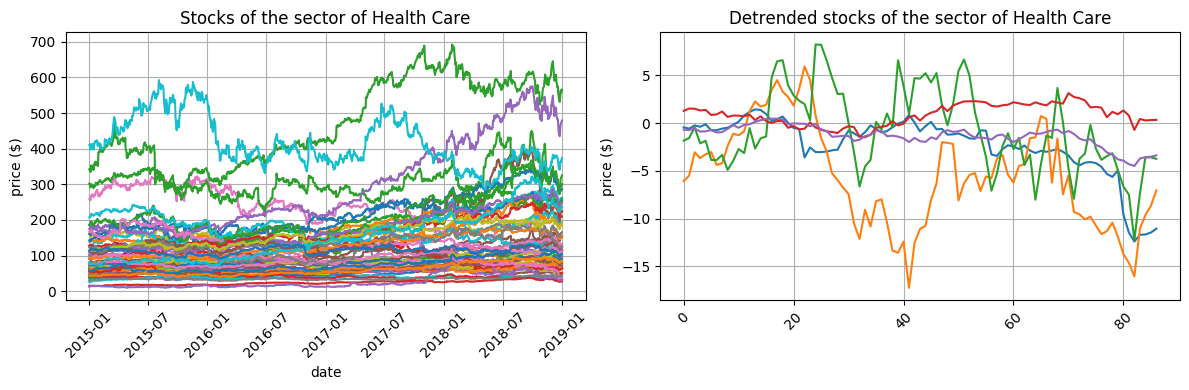

In [33]:
stocks = sector_stocks[chosen_sector]
eigA = eig_regression(stocks)

plt.figure(dpi=100, figsize=(12,4))
plt.subplot(121)
plt.plot(date_axis,stocks)
plt.title('Stocks of the sector of ' + str(chosen_sector))
plt.ylabel('price ($)')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()

plt.subplot(122)
plt.plot(np.array(stocks_detrended))
plt.title('Detrended stocks of the sector of ' + str(chosen_sector))
plt.ylabel('price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

In [34]:
print("Largest eigenvalue Magnitude of VAR(1) in health sector:", np.absolute(max(eigA)))

Largest eigenvalue Magnitude of VAR(1) in health sector: 0.9941531205433555


In [35]:
sector_lem = []
for sector, stocks in sector_stocks.items():
    eigA = eig_regression(stocks)
    lem = np.absolute(max(eigA))
    sector_lem.append( (sector, lem) )
    
headers = ["sector", "largest eigenvalue magnitude"]
# tabulate data
table = tabulate(sector_lem, headers, tablefmt="fancy_grid", floatfmt=".3f")
print(table)

╒════════════════════════╤════════════════════════════════╕
│ sector                 │   largest eigenvalue magnitude │
╞════════════════════════╪════════════════════════════════╡
│ Industrials            │                          0.992 │
├────────────────────────┼────────────────────────────────┤
│ Health Care            │                          0.994 │
├────────────────────────┼────────────────────────────────┤
│ Information Technology │                          0.993 │
├────────────────────────┼────────────────────────────────┤
│ Communication Services │                          0.982 │
├────────────────────────┼────────────────────────────────┤
│ Consumer Discretionary │                          0.991 │
├────────────────────────┼────────────────────────────────┤
│ Utilities              │                          0.986 │
├────────────────────────┼────────────────────────────────┤
│ Financials             │                          1.004 │
├────────────────────────┼──────────────

Constructing a portfolio that consists of stocks from just one sector isn't advisable unless the investor is OK with the additional risk carried. Any negative effects to the industry would cause the majoirty of stocks to lose value. However, the advantange of investing in the sector instead of a single company is that is is less risky. A single company can lose value whilst the overall sector retains a positive or neutral outlook.

It is usefull to analyse sectors as it can show stocks that outperform the rest of the industry. Also the sector wide analysis is less sensistive to individual stock fluctuations, which can make analysis more insightful. 

Additionally, the largest eigenvalue magnitude for the Health sector was under 1. All sectors, apart from the financials sector also had a largest eigenvalue magnitude of under 1. This supports that a portfolio could constructed from the sector as the VAR(1) of that portfolio would be stable.

# Q2 Bond Pricing

## 2.1 Examples of bond pricing

### Q2.1.1
An investor receives USD 1,100 in one year in return for an investment of USD 1,000 now. Calculate the percentage return per annum with: a) Annual compounding, b) Semiannual compounding, c) Monthly compounding, d) Continuous compounding 

In [36]:
import math

ret_ann = 1100/1000 - 1
ret_sann = ((1100/1000)**(1/2) -1) * 2
ret_monthly = ((1100/1000)**(1/12) -1) * 12
ret_cont = math.log(1100/1000)

m = [ ["annual", ret_ann*100], ["semiannual", ret_sann*100], ["monthly", ret_monthly*100], ["continuous", ret_cont*100]]

headers = ["compounding type", "return per annum (%)"]
# tabulate data
table = tabulate(m, headers, tablefmt="fancy_grid", floatfmt=".3f")
print(table)

╒════════════════════╤════════════════════════╕
│ compounding type   │   return per annum (%) │
╞════════════════════╪════════════════════════╡
│ annual             │                 10.000 │
├────────────────────┼────────────────────────┤
│ semiannual         │                  9.762 │
├────────────────────┼────────────────────────┤
│ monthly            │                  9.569 │
├────────────────────┼────────────────────────┤
│ continuous         │                  9.531 │
╘════════════════════╧════════════════════════╛


### Q2.1.2
What rate of interest with continuous compounding is equivalent to 15% per annum with monthly compounding?

In [37]:
equiv_cont = math.log((1+0.15/12)**12)
print("{:.2f}% continuous compounding is equivalent to 15% per annum with monthly compounding".format(equiv_cont*100))

14.91% continuous compounding is equivalent to 15% per annum with monthly compounding


### Q2.1.3
A deposit account pays 12% per annum with continuous compounding, but interest is actually paid quarterly. How much interest will be paid each quarter on a USD 10,000 deposit?


We calculate the continuous compounding interest rate:

In [38]:
cont_rate = math.log(1.12)
print("continuous compounding rate : {:.3f}%".format(cont_rate*100))

continuous compounding rate : 11.333%


In [39]:
init_deposit = 10000
# calc account value after each quarter
first_quarter  = init_deposit   * math.exp(cont_rate/4)
second_quarter = first_quarter  * math.exp(cont_rate/4)
third_quarter  = second_quarter * math.exp(cont_rate/4)
fourth_quarter = third_quarter  * math.exp(cont_rate/4)

m = [["first", first_quarter-init_deposit],
     ["second", second_quarter-first_quarter],
     ["third", third_quarter-second_quarter],
     ["fourth", fourth_quarter-third_quarter]]

headers = ["quarter", "interest paid ($)"]
table = tabulate(m, headers, tablefmt="fancy_grid", floatfmt=".2f")
print(table)

╒═══════════╤═════════════════════╕
│ quarter   │   interest paid ($) │
╞═══════════╪═════════════════════╡
│ first     │              287.37 │
├───────────┼─────────────────────┤
│ second    │              295.63 │
├───────────┼─────────────────────┤
│ third     │              304.13 │
├───────────┼─────────────────────┤
│ fourth    │              312.87 │
╘═══════════╧═════════════════════╛


## Q2.2 Forward rates

Suppose that the one–year interest rate, r1 is 5%, and the two–year interest rate, r2 is 7%. If you invest USD 100 for one year, your investment grows to 100×1.05 = USD105; if you invest for two years, it grows to 100×1.072 = USD114.49. The extra return that you earn for that second year is 1.072/1.05−1 = 0.090, or 9.0 %

 - The decision to invest for two years instead of one depends on how risk-averse the investor is and how long they can comfortably invest for. If a two year period is suitable and the bond has a low risk (i.e. developed country Goverment bond), then the two year investment seems suitable, especially if it beats inflation.
 
 - The 5% strategy pays out the quickest, allowing the investor to re-evaluate after one year. This is suitable if the investor would like to invest in other assets after one year. The 7% strategy has the largest return over the two year period, but requires capital to be locked away the longest. If the investor has no desire to hold other assets over the period, this is the ideal strategy, assuming the bond has very low risk. The 9% strategy, like the 5%, only requires capital to be tied down for one year, but it is tied down in the second year.

 - Whilst providing a higher return compared to 5%, the investor must have the agreed initial captial available after one year to loan. So while free to invest elsewhere in the first year, there is an additional risk of not having the funds when required. This risk is created when investing in other assets in the first year, with the aim of beating 5% for the year.

 - If investing for one year at 5%, then a further 9% is required if reinvesting over the second year, to match the two year investment. The forward rate implies that after one year, the new one year rate would be 9%. However this is unlikely to hold after one year as the one-year and two-year rates are likely to change before then.

## Q2.3 Duration of a coupon-bearing bond

### Q2.3.1 a)
The duration of the 1% bond in Table is found by summing the (Year x Fraction of PV) terms

In [40]:
year_x_frac_pv = [0.0124, 0.0236, 0.0337, 0.0428, 0.0510, 0.0583, 6.5377]

print("The duration is {:.2f} years".format(sum(year_x_frac_pv)))

The duration is 6.76 years


### Q2.3.1 b)

In [41]:
modified_duration = sum(year_x_frac_pv)/(1+0.05)
print("The modified duration is {:.2f}".format(modified_duration))

The modified duration is 6.44


This measures how senstitive the bond price is with respect to the yield, while the duration is the weighted average of the times to each of the cash payments.

### Q2.1.3 c)

Using the duration allows for immunization (sensitivity analyses). A first order immunization using two bonds can allow a pension plan to meet a price P in time D using the following:

$$P = x_{1}P_{1}+x_{2}P_{2} \quad (2.1.3 \space 1) $$

$$D = \frac{x_{1}P_{1}}{D_1} + \frac{x_{2}P_{2}}{D_2} \quad (2.1.3 \space 2) $$

Where $x_{Y}, P_{Y} and D_{Y}$ are the portfolio weighting, bond price and bond duration respectively, for bond $Y$.

This helps to reduce the impact on the pension portfolio against unexpected changes in interest rates (which would affect the prices of the two individual bonds).

## Q2.4 Capital Assest Pricing Model (CAPM) and Arbitrage Pricing Theory (APT)

In [42]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
df = pd.read_csv(r'./../data/fsp_case_31_BSD.csv', index_col=0, header=[0,1])
dates = df['ret'].index
date_axis = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]

### Q2.4.1 Market returns per day

In [43]:
market_returns = df['ret'].mean(axis=1)

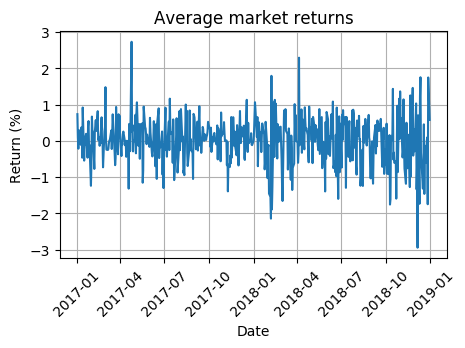

In [44]:
plt.figure(dpi=100, figsize=(5,3))
plt.plot(date_axis, market_returns*100)
plt.title('Average market returns')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.grid()
plt.show()

In [45]:
print("The average market return was {:.7f}% with a std of {:.5f}%".format(np.mean(market_returns), np.std(market_returns)))

The average market return was 0.0000460% with a std of 0.00658%


In [46]:
betas = (df['ret'].rolling(22).cov(df['ret'].mean(axis=1).rolling(22)).T / df['ret'].mean(axis=1).rolling(22).var()).T

### Q2.4.2 Rolling beta

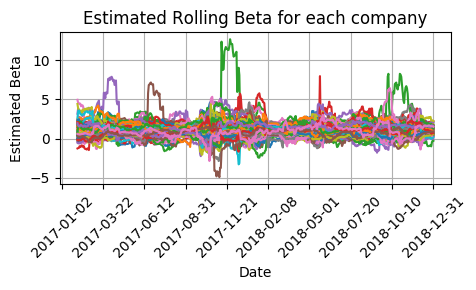

In [47]:
WINDOW = 22 # days
# beta_i = cov_iM / var_MM
#betas = df['ret'].rolling(22).cov(market_returns)/np.var(market_returns)

plt.figure(dpi=100, figsize=(5,3))
plt.plot(betas.index, betas)
plt.title('Estimated Rolling Beta for each company')
plt.xticks([betas.index[i] for i in np.linspace(0,len(betas.index)-1, 10).astype(int)],rotation=45)
plt.xlabel('Date')
plt.ylabel('Estimated Beta')
plt.grid()
plt.tight_layout()
plt.show()

In [48]:
print("The average Beta for all companies was {:.3f} with a an average std of {:.3f}".format(np.mean(np.mean(betas)), np.mean(np.std(betas))))

The average Beta for all companies was 0.983 with a an average std of 0.550


#### Volatility of Rolling Beta

Most rolling beta can be seen above to be volatile, and so cannot be assumed to be constant. This is supported by the std of the mean Beta per company, being close in value to the mean of mean Beta per company. 

### Q2.4.3 Market-cap weighted returns 

In [49]:
market_caps = df['mcap'].sum(axis=1)
mcapw_returns = (df['mcap']*df['ret']).sum(axis=1) / market_caps
betas = (df['ret'].rolling(22).cov(mcapw_returns.rolling(22)).T / mcapw_returns.rolling(22).var()).T

In [50]:
market_caps = df['mcap'].sum(axis=1)
mcapw_returns = (df['mcap']*df['ret']).sum(axis=1) / market_caps

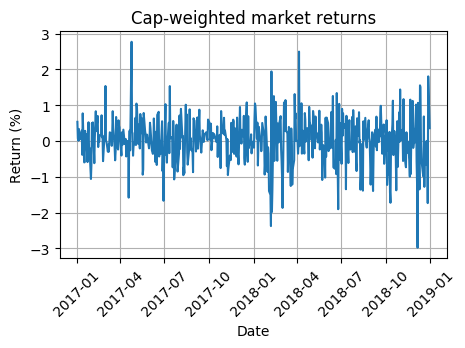

In [51]:
plt.figure(dpi=100, figsize=(5,3))
plt.plot(date_axis, mcapw_returns*100)
plt.title('Cap-weighted market returns')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.grid()
plt.show()

#### Weighting coefficient

This coeffecient is the total market capitalization during that day, assuming the stocks used are all stocks in the market being studied.

### Q2.4.4 Cap-weighted Beta

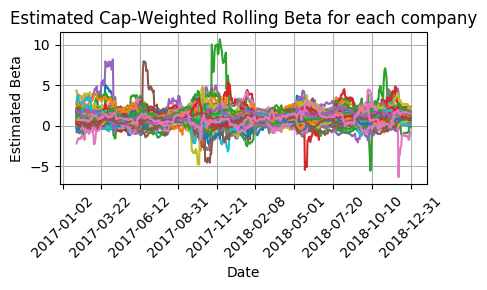

In [52]:
WINDOW = 22 # days
# beta_i = cov_iM / var_MM
betas = (df['ret'].rolling(22).cov(mcapw_returns.rolling(22)).T / mcapw_returns.rolling(22).var()).T

plt.figure(dpi=100, figsize=(5,3))
plt.plot(betas.index, betas)
plt.title('Estimated Cap-Weighted Rolling Beta for each company')
plt.xticks([betas.index[i] for i in np.linspace(0,len(betas.index)-1, 10).astype(int)],rotation=45)
plt.xlabel('Date')
plt.ylabel('Estimated Beta')
plt.grid()
plt.tight_layout()
plt.show()

In [53]:
print("The average cap-weighted Beta for all companies was {:.3f} with a an average std of {:.3f}".format(np.mean(np.mean(betas)), np.mean(np.std(betas))))

The average cap-weighted Beta for all companies was 0.938 with a an average std of 0.562


#### Comparison to equally-weighted Betas

The cap-weighted Betas are also volatile, but have a lower magnitude compared to the equally-weighted, (0.938 mean vs 0.983)

High beta values have decreased in magnitude, which can be observed from the peaks of both plots. This suggests the corresponding companies were being over weighted in the equal wighting. Large Beta suggests that company drives/correlates with the market. If the Beta decreases then that company was contributing more to the market return than it's market capitlization would allow in cap-weighted. This highlights the importance of using cap-weighted Betas when assessing individual companies Betas for investment decisions. 

### Q2.4.5 Arbitrage Pricing Theory (APT) for a two factor model

For this exercise these factors are the cap-weighted market returns and the small minus big (SMB). The sensitivity to SMB is taken to be the natural logarithm of the market value of the asset. The sensitivity to the market returns are the cap-weighted Betas.

Model: $r_i = a +b_{m_i}R_{m}+b_{s_i}R_{s}+\epsilon_{i}$

In [54]:
from sklearn.linear_model import LinearRegression

#### Q2.4.5 a)

In [55]:
num_days = len(betas) - WINDOW + 1
num_stocks = 157

# specific return
e  = np.zeros([num_days, num_stocks])
# coeffecients - per day
rs = np.zeros([num_days])
rm = np.zeros([num_days])

# sensitivities
bs = np.zeros([num_stocks, num_days])
bm = np.zeros([num_stocks, num_days])

# independent term
a  = np.zeros([num_days])

# Y
ri = np.zeros([num_stocks, num_days])

# Fill above arrays
df1 = df.replace([np.inf, -np.inf], np.nan)
df1 = df.fillna(0)
i = 0
for date, stock in df1['mcap'].iteritems():
    stock_ = stock.replace([0], 1) # log(1) = 0
    bs[i] = np.log(stock_)[21:]
    #bs[i][bs[i] == -np.inf] = 0
    i += 1
i = 0
betas_ = betas.replace([np.inf, -np.inf], np.nan)
betas_ = betas_.fillna(0)
for date, stock in betas_.iteritems():
    bm[i] = stock[21:]
    i += 1
i = 0
for date, stock in df1['ret'].iteritems():
    ri[i] = stock[21:]
    i += 1
    
# Prep for Linear Regression
X = np.zeros([num_days, num_stocks, 2])
for t in range(num_days):
    for i in range(num_stocks):
        X[t,i,0] = bm[i,t]
        X[t,i,1] = bs[i,t]
Y = ri.T.reshape([num_days, num_stocks])

for t in range(num_days):
    reg = LinearRegression().fit(X[t,:,:],Y[t,:])
    y_pred = reg.predict(X[t,:,:])
    e[t,:] = Y[t,:] - y_pred
    a[t] = reg.intercept_
    rm[t] = reg.coef_[0]
    rs[t] = reg.coef_[1]

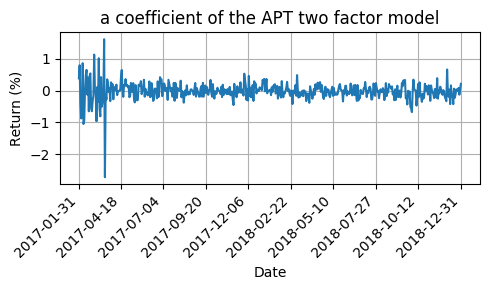

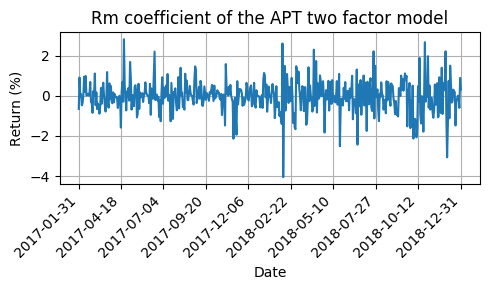

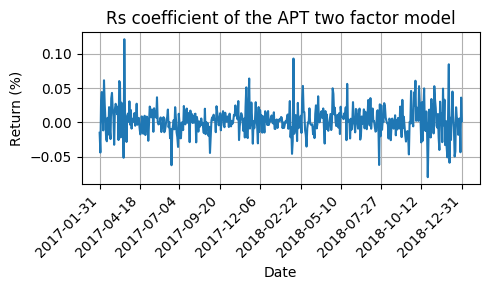

In [56]:
plt_dates = betas.index[21:]

fig, ax = plt.subplots(dpi=100, figsize=(5,3))
ax.plot(plt_dates, a*100)
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.title('a coefficient of the APT two factor model')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.grid()
plt.xticks([plt_dates[i] for i in np.linspace(0,len(plt_dates)-1, 10).astype(int)],rotation=45)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(dpi=100, figsize=(5,3))
ax.plot(plt_dates, rm*100, label='Rm')
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.title('Rm coefficient of the APT two factor model')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.grid()
plt.xticks([plt_dates[i] for i in np.linspace(0,len(plt_dates)-1, 10).astype(int)],rotation=45)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(dpi=100, figsize=(5,3))
ax.plot(plt_dates, rs*100, label='Rs')
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.title('Rs coefficient of the APT two factor model')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.grid()
plt.xticks([plt_dates[i] for i in np.linspace(0,len(plt_dates)-1, 10).astype(int)],rotation=45)
plt.tight_layout()
plt.show()

#### Q2.4.5 b)

In [57]:
a_mean, a_std   = np.mean(a), np.std(a)
rm_mean, rm_std = np.mean(rm), np.std(rm)
rs_mean, rs_std = np.mean(rs), np.std(rs)

ma_mean, ma_std   = np.mean(np.absolute(a)), np.std(np.absolute(a))
mrm_mean, mrm_std = np.mean(np.absolute(rm)), np.std(np.absolute(rm))
mrs_mean, mrs_std = np.mean(np.absolute(rs)), np.std(np.absolute(rs))

m = [["a", a_mean*100, a_std*100],
     ["Rm", rm_mean*100, rm_std*100],
     ["Rs", rs_mean*100, rs_std*100],
     ["|a|", ma_mean*100, ma_std*100],
     ["|Rm|", mrm_mean*100, mrm_std*100],
     ["|Rs|", mrs_mean*100, mrs_std*100]]

headers = ["parameter", "mean (%)", "stddev"]
table = tabulate(m, headers, tablefmt="fancy_grid", floatfmt=".5f")
print(table)

╒═════════════╤════════════╤══════════╕
│ parameter   │   mean (%) │   stddev │
╞═════════════╪════════════╪══════════╡
│ a           │   -0.02311 │  0.27715 │
├─────────────┼────────────┼──────────┤
│ Rm          │   -0.03306 │  0.78403 │
├─────────────┼────────────┼──────────┤
│ Rs          │    0.00254 │  0.02126 │
├─────────────┼────────────┼──────────┤
│ |a|         │    0.17948 │  0.21245 │
├─────────────┼────────────┼──────────┤
│ |Rm|        │    0.56310 │  0.54655 │
├─────────────┼────────────┼──────────┤
│ |Rs|        │    0.01517 │  0.01511 │
╘═════════════╧════════════╧══════════╛


The mean magnitdue of Rm is about 0.6%, whereas the mean magnitude of Rs is around 0.015%, or over 30 times smaller. This means that the market return is more significant than the exposure to size for daily returns. A also has a significantly larger mean magnitude compared to Rs, just over 10 times larger.

Rm also has a very large variance. This can be explained by there being days where prices change significantly and there being many days where prices remain at similar levels. Essentially, the market is volatile inter-day.

Rs has a vary low variance. By taking the log of the market cap, this factor has been made less sensitive to changes and so the inter-day variation is low.

The value of 'a' mainly varies between 1% and -1%, with a mean of approximately 0 and a stddev of 0.277. This term can be considered as the risk-free rate for that day. The negative values can be viewed as the market pricing the rate as negative, as seen with German goverment bonds. If analysing data from the USA, over the same period, 'a' should have a larger positive mean, due to US goverment bonds having a higher yield.

#### Q2.4.5 c)

In [58]:
e_bystock = e.T

In [59]:
e_corr = np.zeros([num_stocks])
for i in range(num_stocks):
    e_corr[i] = np.corrcoef(e_bystock[i], ri[i])[1][0]

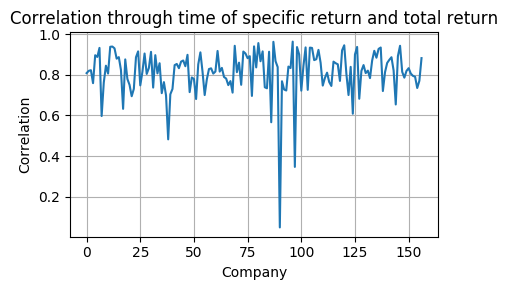

In [61]:
plt.figure(dpi=100, figsize=(5,3))
plt.plot(e_corr)
plt.title('Correlation through time of specific return and total return')
plt.xlabel('Company')
plt.ylabel('Correlation')
plt.grid()
plt.tight_layout()
plt.show()

#### Q2.4.5 d)

In [62]:
R = np.array([rm, rs]).T
R_cov = np.cov(R, rowvar=False)

In [63]:
print("The covariance matrix of R is")
print(R_cov)

The covariance matrix of R is
[[ 6.15936602e-05 -8.05737998e-07]
 [-8.05737998e-07  4.52932279e-08]]


In [64]:
R_eig, _ = np.linalg.eig(R_cov)
print('The eigen values of the covariance matrix are')
print(R_eig)

The eigen values of the covariance matrix are
[6.16042064e-05 3.47470098e-08]


The covariance between Rm and Rs is $-8.06e^{-7}$.

This is small, approximately zero. This could be due to the small magnitude of Rs, but Rs can be said to have no significant impact on Rm.

This matrix is also stable as the magnitude of the eigen values are less than 1.

#### Q2.4.5 e)

In [65]:
E_cov = np.cov(e, rowvar=False)

In [66]:
from sklearn.decomposition import PCA

In [67]:
pca_e = PCA()
pca_e.fit(E_cov)

m = [(i+1, pca_e.explained_variance_ratio_[i]*100) for i in range(10)]
headers = ["component", "perc. variance explained (%)"]
table = tabulate(m, headers, tablefmt="fancy_grid", floatfmt=".3f")
print("Percentage of the variance explained by the ﬁrst ten principal components - Specific Returns Covariance")
print(table)

Percentage of the variance explained by the ﬁrst ten principal components - Specific Returns Covariance
╒═════════════╤════════════════════════════════╕
│   component │   perc. variance explained (%) │
╞═════════════╪════════════════════════════════╡
│           1 │                         25.744 │
├─────────────┼────────────────────────────────┤
│           2 │                         11.505 │
├─────────────┼────────────────────────────────┤
│           3 │                          9.949 │
├─────────────┼────────────────────────────────┤
│           4 │                          5.978 │
├─────────────┼────────────────────────────────┤
│           5 │                          4.391 │
├─────────────┼────────────────────────────────┤
│           6 │                          3.799 │
├─────────────┼────────────────────────────────┤
│           7 │                          3.148 │
├─────────────┼────────────────────────────────┤
│           8 │                          2.709 │
├─────────────

The first 10 components, out of 157, account for explaining 71.84% of the variance.

The specific return used, deducts the market return and market size factors already. Therefore, the covariance between these returns can show if there exists other factors not alreasy accounted for. By performing PCA, these factors can be extracted out. The first compoment represents a potential factor that could explain about 26% of the specific returns. This is a significant amount, and so a third factor derived from this, by assessing the covariance has the potential to increase the prediction accuracy of a new, 3 factor APT.

In [68]:
DR_cov = np.cov(ri)
pca_dr = PCA()
pca_dr.fit(DR_cov)

m = [(i+1, pca_dr.explained_variance_ratio_[i]*100) for i in range(10)]
headers = ["component", "perc. variance explained (%)"]
table = tabulate(m, headers, tablefmt="fancy_grid", floatfmt=".3f")
print("Percentage of the variance explained by the ﬁrst ten principal components - Daily Returns Covariance")
print(table)

Percentage of the variance explained by the ﬁrst ten principal components - Daily Returns Covariance
╒═════════════╤════════════════════════════════╕
│   component │   perc. variance explained (%) │
╞═════════════╪════════════════════════════════╡
│           1 │                         35.439 │
├─────────────┼────────────────────────────────┤
│           2 │                         19.105 │
├─────────────┼────────────────────────────────┤
│           3 │                          7.855 │
├─────────────┼────────────────────────────────┤
│           4 │                          6.900 │
├─────────────┼────────────────────────────────┤
│           5 │                          3.509 │
├─────────────┼────────────────────────────────┤
│           6 │                          2.889 │
├─────────────┼────────────────────────────────┤
│           7 │                          2.301 │
├─────────────┼────────────────────────────────┤
│           8 │                          1.732 │
├─────────────┼──

The table above looks at the first few components, when performing PCA on the covariance of the original daily returns. The first two components explain a higher percentage of variance. This supports the idea that the factors used in the APT model account for taking away variance in the specific returns. Namely, the market return and market size factors reduced the variance of the specific returns, leading to the first component of PCA explaining a lower ratio of the variance. 

# Q3 Portfolio Optimization

## Q3.1 Adaptive minimum-variance portfolio optimization

### Q3.1.1 Minimum Variance Portfolio Optimization

By allowing negative weights on assets, or, allowing short selling, the minimum-variance portfolio is given by:

$$
min \quad \frac{1}{2}\mathbf{w}^{T}\mathbf{C}\mathbf{w} \quad \quad (3.1.1\space1)
$$

$$
subject\space to \quad \mathbf{w}^{T}\mathbf{1} = 1
$$

The minimum-vaariance portfolio optimization problem can be solved by finding the optimal conditions for the associated Lagrangian function:

$$
L(\mathbf{w}, \lambda, \mu) = \frac{1}{2}\mathbf{w}^{T}\mathbf{C}\mathbf{w} - \lambda(\mathbf{w}\mathbf{1}-1) \quad (3.1.1\space2)
$$

By differentiating w.r.t. $\textbf{w}$ and $\lambda$ and assuming that $\textbf{C}$ is invertible, the following optimality conditions are obtained:

$$
\frac{dL}{d\textbf{w}} = \textbf{C}\textbf{w} - \lambda \textbf{1} = 0 
\text{ -> } 
\textbf{w} = \lambda \textbf{C}^{-1} \textbf{1} \quad (3.1.1\space3)
$$
$$
\frac{dL}{d\lambda} = \textbf{w}^T \textbf{1} - 1 = 0 \text{ -> } \textbf{w}^T \textbf{1} = 1 \quad (3.1.1\space4)
$$

The set of optimal weights $\textbf{w}_{opt}$ can be found by solving for $\lambda$ and substituting:
$$
\textbf{w}^T \textbf{1} = (\lambda \textbf{C}^{-1} \textbf{1})^T \textbf{1} 
= \lambda \textbf{1}^T \textbf{C}^{-1^T} \textbf{1} = 1 \quad (3.1.1\space5)
$$
$$
\text{ -> } 
\lambda = \frac{1}{\textbf{1}^T \textbf{C}^{-1^T} \textbf{1}} \quad (3.1.1\space6)
$$
$$
\textbf{w}_{opt} = \lambda \textbf{C}^{-1} \textbf{1} 
= \frac{1}{\textbf{1}^T \textbf{C}^{-1^T} \textbf{1}} \textbf{C}^{-1} \textbf{1} \quad (3.1.1\space7)
$$

The theoretical variance of the returns using $\textbf{w}_{opt}$ is given by:

$$
\sigma_p^2 = \textbf{w}_{opt}^T\textbf{C}\textbf{w}_{opt} 
= \frac{1}{\textbf{1}^T \textbf{C}^{-1^T} \textbf{1}} (\textbf{C}^{-1} \textbf{1})^T
\textbf{C}
\frac{1}{\textbf{1}^T \textbf{C}^{-1^T} \textbf{1}} \textbf{C}^{-1} \textbf{1} \quad (3.1.1\space8)
$$

$$
\sigma_p^2 = \frac{1}{(\textbf{1}^T \textbf{C}^{-1^T} \textbf{1})^2} 
(\textbf{C}^{-1} \textbf{1})^T \textbf{C} (\textbf{C}^{-1} \textbf{1})
= \frac{1}{(\textbf{1}^T \textbf{C}^{-1^T} \textbf{1})^2} 
\textbf{1}^T \textbf{C}^{-1^T} \textbf{1}
= \frac{1}{\textbf{1}^T \textbf{C}^{-1^T} \textbf{1}} \quad (3.1.1\space9)
$$

### Q3.1.2 Static Mimimum Variance Portfolio

In [69]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from tabulate import tabulate

In [70]:
df = pd.read_csv(r'./../data/fsp_case_31_BSD.csv', index_col=0, header=[0,1])
dates = df['ret'].index
date_axis = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]
df = df['ret'].T[-10:].T

In [71]:
df_train = df[:260]
df_test  = df[260:]

In [72]:
def optimal_weights(returns):
    C = np.cov(returns, rowvar=False)
    C_inv = np.linalg.inv(C)
    ones = np.ones(shape=[C.shape[0]])

    w_opt = ( np.dot(C_inv,ones) ) / ( np.dot(np.dot(ones.T,C_inv.T), ones) )

    theo_var = 1 / ( np.dot(np.dot(ones.T,C_inv.T), ones) )
    
    return w_opt, theo_var

In [73]:
def test_portfolio(weights, returns):
    port_returns = (returns*weights).sum(axis=1)
    
    var = np.var(port_returns)
    
    return port_returns, var, port_returns.cumsum()

#### Equally Weighted Portfolio

In [74]:
weights = [1/10 for _ in range(10)]
ret, var_ew, cum_ret = test_portfolio(weights, df_test)

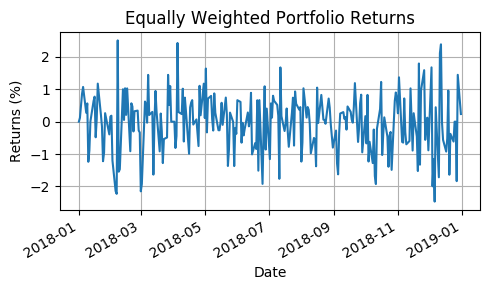

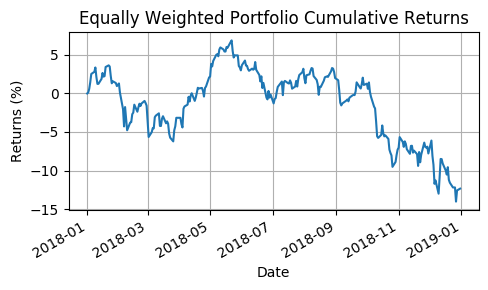

In [75]:
fig, ax = plt.subplots(dpi=100, figsize=(5,3))
ax.plot(date_axis[260:], ret*100)
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.title('Equally Weighted Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.grid()
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(dpi=100, figsize=(5,3))
ax.plot(date_axis[260:], cum_ret*100)
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.title('Equally Weighted Portfolio Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.grid()
plt.tight_layout()
plt.show()

#### Min-Var Portfolio

In [76]:
weights, theo_var = optimal_weights(df_train)
ret_mv, var_mv, cum_ret_mv = test_portfolio(weights, df_test)

In [77]:
print("Theoretical variance of this portfolio: {:.7f}".format(theo_var))

Theoretical variance of this portfolio: 0.0000286


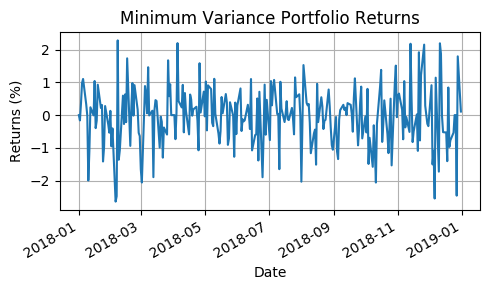

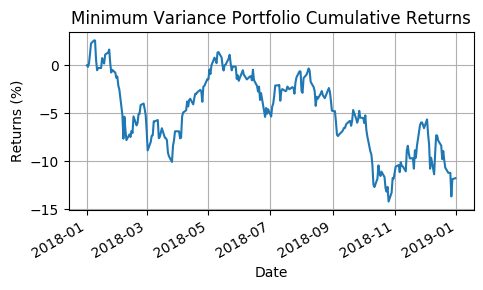

In [78]:
fig, ax = plt.subplots(dpi=100, figsize=(5,3))
ax.plot(date_axis[260:], ret_mv*100)
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.title('Minimum Variance Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.grid()
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(dpi=100, figsize=(5,3))
ax.plot(date_axis[260:], cum_ret_mv*100)
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.title('Minimum Variance Portfolio Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.grid()
plt.tight_layout()
plt.show()

In [79]:
m = [["Equal Weights", ret.mean()*100, cum_ret[-1]*100, var_ew],
     ["Min-Var", ret_mv.mean()*100, cum_ret_mv[-1]*100, var_mv]]
headers = ["Strategy", "Mean Return (%)", "Final Cumulative Ret (%)", "Variance"]
table = tabulate(m, headers, tablefmt="fancy_grid", floatfmt=".7f")
print(table)

╒═══════════════╤═══════════════════╤════════════════════════════╤════════════╕
│ Strategy      │   Mean Return (%) │   Final Cumulative Ret (%) │   Variance │
╞═══════════════╪═══════════════════╪════════════════════════════╪════════════╡
│ Equal Weights │        -0.0473190 │                -12.3502700 │  0.0000790 │
├───────────────┼───────────────────┼────────────────────────────┼────────────┤
│ Min-Var       │        -0.0450505 │                -11.7581753 │  0.0000816 │
╘═══════════════╧═══════════════════╧════════════════════════════╧════════════╛


The min-var portfolio had a slighly lower mean daily return than the equally weighted portfolio, but had a better final cumalative return.

The variance of the portfolio returns, $8.16e-5$ was greater than the theoretical variance of $2.86e-5$. It was also greater than the variance of the equally weighted portfolio ($7.90e-5$). This shows that a minimum variance portolio over one time period, is not guaranteed to also be a minimum variance portfolio over a different time period.

### Q3.1.3 Adaptive Mimimum Variance Portfolio

In [80]:
# df contains 561 daily returns for 10 stocks

In [81]:
def optimal_weights_rolling(returns, M):
    Cs = df_t.rolling(M).cov().to_numpy()[M*10:,:].reshape([261,10,10])
    C_invs = np.linalg.inv(Cs)
    ones = np.ones(shape=[10])

    num = np.dot(C_invs,ones)
    div = np.dot(np.dot(ones.T,C_invs.transpose((0,2,1))), ones)

    w_opt = num
    for i, d in enumerate(div):
        w_opt[i] /= d
    
    return w_opt

In [82]:
def test_portfolio_rolling(returns, weights, M):
    
    port_returns = (returns[M:]*weights).sum(axis=1)

    var = port_returns.var()

    return port_returns, var, port_returns.cumsum()

In [83]:
M = 260
df_t = df[260-M:]

w = optimal_weights_rolling(df_t, M)

rt, var, cum_rt = test_portfolio_rolling(df_t, w, M)

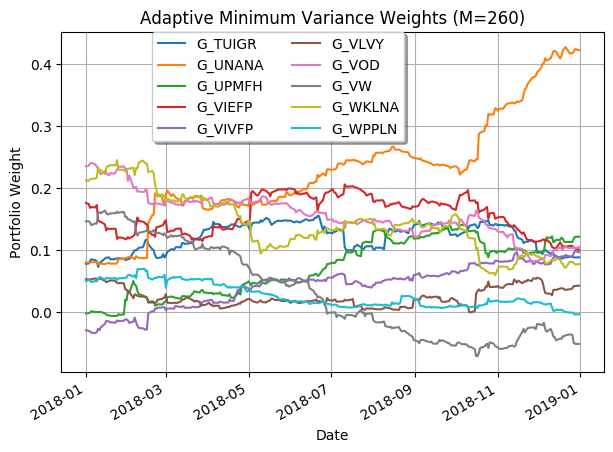

In [84]:
fig, ax = plt.subplots(dpi=100, figsize=(7,5))
i=0
for stock in df:
    ax.plot(date_axis[260:], w.T[i], label=stock)
    i += 1
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.title('Adaptive Minimum Variance Weights (M=260)')
plt.xlabel('Date')
plt.ylabel('Portfolio Weight')
plt.grid()
#plt.tight_layout()
ax.legend(loc='upper center', bbox_to_anchor=(0.4, 1.02),
          ncol=2, fancybox=True, shadow=True)
plt.show()

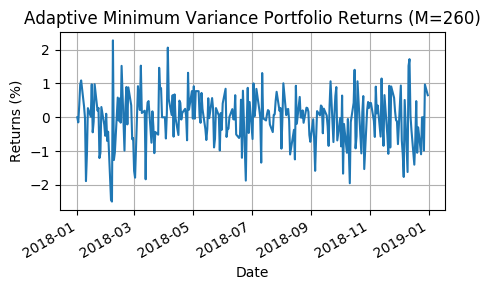

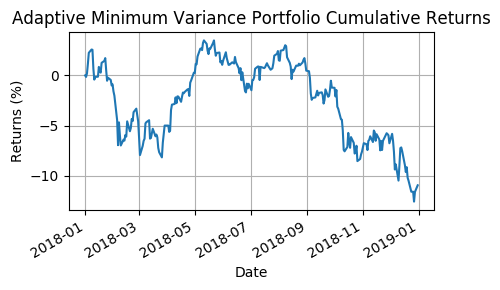

In [85]:
fig, ax = plt.subplots(dpi=100, figsize=(5,3))
ax.plot(date_axis[260:], rt*100)
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.title('Adaptive Minimum Variance Portfolio Returns (M=260)')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.grid()
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(dpi=100, figsize=(5,3))
ax.plot(date_axis[260:], cum_rt*100)
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.title('Adaptive Minimum Variance Portfolio Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.grid()
plt.tight_layout()
plt.show()

In [86]:
m = [["Equal Weights", ret.mean()*100, cum_ret[-1]*100, var_ew],
     ["Static Min-Var", ret_mv.mean()*100, cum_ret_mv[-1]*100, var_mv],
     ["Adaptive Min-Var", rt.mean()*100, cum_rt[-1]*100, var]]
headers = ["Strategy", "Mean Return (%)", "Final Cumulative Ret (%)", "Variance"]
table = tabulate(m, headers, tablefmt="fancy_grid", floatfmt=".7f")
print(table)

╒══════════════════╤═══════════════════╤════════════════════════════╤════════════╕
│ Strategy         │   Mean Return (%) │   Final Cumulative Ret (%) │   Variance │
╞══════════════════╪═══════════════════╪════════════════════════════╪════════════╡
│ Equal Weights    │        -0.0473190 │                -12.3502700 │  0.0000790 │
├──────────────────┼───────────────────┼────────────────────────────┼────────────┤
│ Static Min-Var   │        -0.0450505 │                -11.7581753 │  0.0000816 │
├──────────────────┼───────────────────┼────────────────────────────┼────────────┤
│ Adaptive Min-Var │        -0.0419880 │                -10.9588718 │  0.0000603 │
╘══════════════════╧═══════════════════╧════════════════════════════╧════════════╛


The adaptive portfolio showed better performance vs the previous two strategies in terms of variance, when using $M=260$ having the lowest at $6.03e-5$. It also resulted in a better final cumulative return, but still lost value. However, in practice, updating portfolio weights daily substantially increases transactions costs, and would resslt in lower returns than shown. 

#### Varying Roliing Window, M

In [87]:
base_M = 21

variances = []
cum_returns = []

for i in range(1, 13):
    M = i*base_M
    df_t = df[260-M:]

    w = optimal_weights_rolling(df_t, M)
    rt, var, cum_rt = test_portfolio_rolling(df_t, w, M)
    
    variances.append(var)
    cum_returns.append(cum_rt[-1])

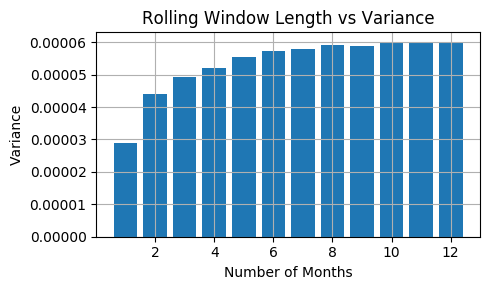

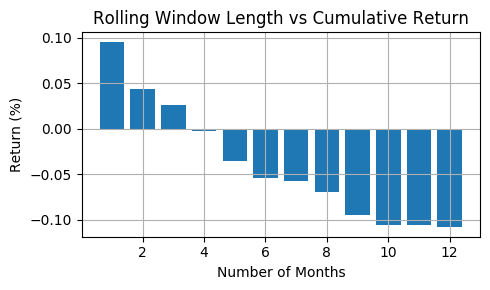

In [88]:
fig, ax = plt.subplots(dpi=100, figsize=(5,3))
ax.bar(list(range(1,13)), variances)
plt.title('Rolling Window Length vs Variance')
plt.xlabel('Number of Months')
plt.ylabel('Variance')
plt.grid()
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(dpi=100, figsize=(5,3))
ax.bar(list(range(1,13)), cum_returns)
plt.title('Rolling Window Length vs Cumulative Return')
plt.xlabel('Number of Months')
plt.ylabel('Return (%)')
plt.grid()
plt.tight_layout()
plt.show()

Taking 21 days as one trading month, the number of months the minimum-variance portfolio weights was trained on was varied from 1 to 12. As the number of months increased, so did the variance of the returns, and the cumaltive return decreased. Using shorter rolling windows of 1 to 3 months, resulted in positive cumulative returns and significantly smaller variances. This shows that the market was changing enough at least every quarter, that a rebalancing would be required to produce good performance. It is important to note that transactions costs would be independent of the rolling window length, as the portolfio weights are updated daily for each M tested.

The covariance matrix used equal weightings to each daily return in the rolling window. However, there are other methods to assign the weightings. For example, it is possible to place a greater reliance on more recent daily returns, by using an exponential weight with the daily returns when calculating the rolling covariance matrices. So, more recent returns have a larger weighting than older returns. This introduces additional parameters to investigate, such as the decay rate of the weightings. This would be more useful when looking at windows of one quarter or greater, as it allows historical data to have some influence whilst also heavily capturing the more recent trends. 